# Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines

## Importing requirements

In [370]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Models
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN
import xgboost as xgb

#Parameter Search
from sklearn.model_selection import GridSearchCV

#Metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


## Loading data

In [371]:
#Opening both datasets with pandas
features = pd.read_csv("training_set_features.csv")
labels = pd.read_csv("training_set_labels.csv")

In [372]:
#Combining the labels with the features
data = pd.merge(features, labels)

In [373]:
data.head(15)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               0           1.0             0.0                        0.0   
1               1           3.0             2.0                        0.0   
2               2           1.0             1.0                        0.0   
3               3           1.0             1.0                        0.0   
4               4           2.0             1.0                        0.0   
5               5           3.0             1.0                        0.0   
6               6           0.0             0.0                        0.0   
7               7           1.0             0.0                        0.0   
8               8           0.0             2.0                        0.0   
9               9           2.0             1.0                        0.0   
10             10           2.0             1.0                        0.0   
11             11           1.0             2.0                        0.0   
12             12           1.0             1.0                        0.0   
13             13           1.0             1.0                        0.0   
14             14           3.0             1.0                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                    0.0                   0.0                    0.0   
1                    1.0                   0.0                    1.0   
2                    1.0                   0.0                    0.0   
3                    1.0                   0.0                    1.0   
4                    1.0                   0.0                    1.0   
5                    1.0                   0.0                    1.0   
6                    0.0                   0.0                    0.0   
7                    1.0                   0.0                    1.0   
8                    1.0                   0.0                    1.0   
9                    1.0                   0.0                    0.0   
10                   1.0                   0.0                    1.0   
11                   1.0                   0.0                    1.0   
12                   1.0                   0.0                    1.0   
13                   1.0                   0.0                    1.0   
14                   1.0                   0.0                    1.0   

    behavioral_large_gatherings  behavioral_outside_home  \
0                           0.0                      1.0   
1                           0.0                      1.0   
2                           0.0                      0.0   
3                           1.0                      0.0   
4                           1.0                      0.0   
5                           0.0                      0.0   
6                           0.0                      0.0   
7                           0.0                      0.0   
8                           1.0                      1.0   
9                           1.0                      0.0   
10                          1.0                      0.0   
11                          0.0                      0.0   
12                          1.0                      0.0   
13                          0.0                      0.0   
14                          0.0                      1.0   

    behavioral_touch_face  ...  rent_or_own   employment_status  \
0                     1.0  ...          Own  Not in Labor Force   
1                     1.0  ...         Rent            Employed   
2                     0.0  ...          Own            Employed   
3                     0.0  ...         Rent  Not in Labor Force   
4                     1.0  ...          Own            Employed   
5                     1.0  ...          Own            Employed   
6                     0.0  ...          Own            Employed   
7                     1.0  ...          Own            Employed   
8                     

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

We can see the data types available for this dataset are 25 instances of floats, 1 integer and 12 objects.

In [375]:
data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [376]:
data.describe().transpose()

count          mean          std  min     25%  \
respondent_id                26707.0  13353.000000  7709.791156  0.0  6676.5   
h1n1_concern                 26615.0      1.618486     0.910311  0.0     1.0   
h1n1_knowledge               26591.0      1.262532     0.618149  0.0     1.0   
behavioral_antiviral_meds    26636.0      0.048844     0.215545  0.0     0.0   
behavioral_avoidance         26499.0      0.725612     0.446214  0.0     0.0   
behavioral_face_mask         26688.0      0.068982     0.253429  0.0     0.0   
behavioral_wash_hands        26665.0      0.825614     0.379448  0.0     1.0   
behavioral_large_gatherings  26620.0      0.358640     0.479610  0.0     0.0   
behavioral_outside_home      26625.0      0.337315     0.472802  0.0     0.0   
behavioral_touch_face        26579.0      0.677264     0.467531  0.0     0.0   
doctor_recc_h1n1             24547.0      0.220312     0.414466  0.0     0.0   
doctor_recc_seasonal         24547.0      0.329735     0.470126  0.0     0.0   
chronic_med_condition        25736.0      0.283261     0.450591  0.0     0.0   
child_under_6_months         25887.0      0.082590     0.275266  0.0     0.0   
health_worker                25903.0      0.111918     0.315271  0.0     0.0   
health_insurance             14433.0      0.879720     0.325300  0.0     1.0   
opinion_h1n1_vacc_effective  26316.0      3.850623     1.007436  1.0     3.0   
opinion_h1n1_risk            26319.0      2.342566     1.285539  1.0     1.0   
opinion_h1n1_sick_from_vacc  26312.0      2.357670     1.362766  1.0     1.0   
opinion_seas_vacc_effective  26245.0      4.025986     1.086565  1.0     4.0   
opinion_seas_risk            26193.0      2.719162     1.385055  1.0     2.0   
opinion_seas_sick_from_vacc  26170.0      2.118112     1.332950  1.0     1.0   
household_adults             26458.0      0.886499     0.753422  0.0     0.0   
household_children           26458.0      0.534583     0.928173  0.0     0.0   
h1n1_vaccine                 26707.0      0.212454     0.409052  0.0     0.0   
seasonal_vaccine             26707.0      0.465608     0.498825  0.0     0.0   

                                 50%      75%      max  
respondent_id                13353.0  20029.5  26706.0  
h1n1_concern                     2.0      2.0      3.0  
h1n1_knowledge                   1.0      2.0      2.0  
behavioral_antiviral_meds        0.0      0.0      1.0  
behavioral_avoidance             1.0      1.0      1.0  
behavioral_face_mask             0.0      0.0      1.0  
behavioral_wash_hands            1.0      1.0      1.0  
behavioral_large_gatherings      0.0      1.0      1.0  
behavioral_outside_home          0.0      1.0      1.0  
behavioral_touch_face            1.0      1.0      1.0  
doctor_recc_h1n1                 0.0      0.0      1.0  
doctor_recc_seasonal             0.0      1.0      1.0  
chronic_med_condition            0.0      1.0      1.0  
child_under_6_months             0.0      0.0      1.0  
health_worker                    0.0      0.0      1.0  
health_insurance                 1.0      1.0      1.0  
opinion_h1n1_vacc_effective      4.0      5.0      5.0  
opinion_h1n1_risk                2.0      4.0      5.0  
opinion_h1n1_sick_from_vacc      2.0      4.0      5.0  
opinion_seas_vacc_effective      4.0      5.0      5.0  
opinion_seas_risk                2.0      4.0      5.0  
opinion_seas_sick_from_vacc      2.0      4.0      5.0  
household_adults                 1.0      1.0      3.0  
household_children               0.0      1.0      3.0  
h1n1_vaccine                     0.0      0.0      1.0  
seasonal_vaccine                 0.0      1.0      1.0

In [377]:
data.shape

(26707, 38)

In [378]:
profile = ProfileReport(data, title="H1N1 and Seasonal Flu Vaccines")

In [379]:
#profile

In [380]:
features = data.iloc[:, :-2]
features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [381]:
labels = data.iloc[:, -2:]
labels.head()

h1n1_vaccine  seasonal_vaccine
0             0                 0
1             0                 1
2             0                 0
3             0                 1
4             0                 0

## Pre-Processing

### Checking Duplicates 

In [382]:
features.duplicated().sum()

0

There are no duplicates in this dataset

### Checking missing data

In [383]:
features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [384]:
features.isnull().sum()/len(data)*100

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

We can see that nearly all of the data has over 50% of missing data with employment occupation being the highest with 75%

We drop the random-coded independent variables as they cannot be decoded:
- hhs_geo_region
- employment_industry
- employment_occupation


In [385]:
features.drop(["hhs_geo_region", "employment_industry", "employment_occupation"], axis = 1, inplace = True)
features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...         education   race     sex  \
0                    1.0  ...        < 12 Years  White  Female   
1                    1.0  ...          12 Years  White    Male   
2                    0.0  ...  College Graduate  White    Male   
3                    0.0  ...          12 Years  White  Female   
4                    1.0  ...      Some College  White  Female   

              income_poverty  marital_status  rent_or_own   employment_status  \
0              Below Poverty     Not Married          Own  Not in Labor Force   
1              Below Poverty     Not Married         Rent            Employed   
2  <= $75,000, Above Poverty     Not Married          Own            Employed   
3              Below Poverty     Not Married         Rent  Not in Labor Force   
4  <= $75,000, Above Poverty         Married          Own            Employed   

                 census_msa  household_adults  household_children  
0                   Non-MSA               0.0                 0.0  
1  MSA, Not Principle  City               0.0                 0.0  
2  MSA, Not Principle  City               2.0                 0.0  
3       MSA, Principle City               0.0                 0.0  
4  MSA, Not Principle  City               1.0                 0.0  

[5 rows x 33 columns]

### Imputation of the missing data

Our dataset is quite imbalanced so we can impute this missing data to balance it out

In [386]:
#Assigning the numerical data to a variable
numeric_data = features._get_numeric_data()

In [387]:
#Imputing Numerical Data with the median
for column in numeric_data:
    features[column].fillna(features[column].median(), inplace= True)

In [388]:
features.isnull().sum()/len(data)*100


respondent_id                   0.000000
h1n1_concern                    0.000000
h1n1_knowledge                  0.000000
behavioral_antiviral_meds       0.000000
behavioral_avoidance            0.000000
behavioral_face_mask            0.000000
behavioral_wash_hands           0.000000
behavioral_large_gatherings     0.000000
behavioral_outside_home         0.000000
behavioral_touch_face           0.000000
doctor_recc_h1n1                0.000000
doctor_recc_seasonal            0.000000
chronic_med_condition           0.000000
child_under_6_months            0.000000
health_worker                   0.000000
health_insurance                0.000000
opinion_h1n1_vacc_effective     0.000000
opinion_h1n1_risk               0.000000
opinion_h1n1_sick_from_vacc     0.000000
opinion_seas_vacc_effective     0.000000
opinion_seas_risk               0.000000
opinion_seas_sick_from_vacc     0.000000
age_group                       0.000000
education                       5.268282
race            

We've now replaced the numerical data with the median of each column

In [389]:
#Assigned the columns with categorical data to a variable
categorical_data = ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']

In [390]:
#Imputing the categorical data with the mode of each column
for column in categorical_data:
    features[column].fillna(features[column].mode()[0], inplace=True)

In [391]:
features.isnull().sum()/len(data)*100

respondent_id                  0.0
h1n1_concern                   0.0
h1n1_knowledge                 0.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          0.0
doctor_recc_h1n1               0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
health_insurance               0.0
opinion_h1n1_vacc_effective    0.0
opinion_h1n1_risk              0.0
opinion_h1n1_sick_from_vacc    0.0
opinion_seas_vacc_effective    0.0
opinion_seas_risk              0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
income_poverty                 0.0
marital_status                 0.0
rent_or_own         

In [392]:
def balance(features):
    from collections import Counter
    from numpy import log
    
    n = len(data)
    classes = [(clas,float(count)) for clas,count in Counter(data).items()]
    k = len(classes)
    
    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

### Seperating categorical and numerical data

In [393]:
cat=[]
num=[]
for i in features.columns:
    if features[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)

In [394]:
print(cat)

['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


In [395]:
print(num)

['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


### Checking if the dataset is balanced

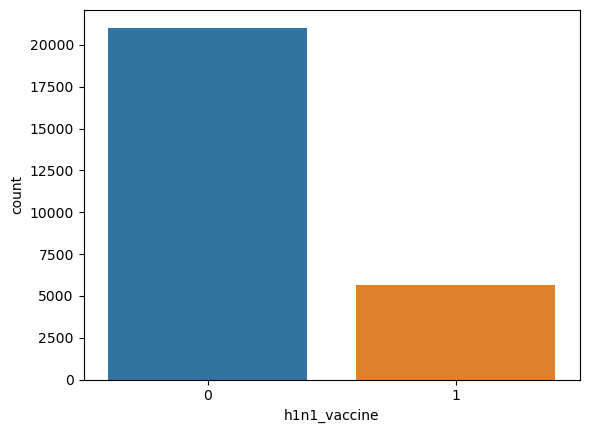

In [396]:
sns.countplot(x="h1n1_vaccine", data=labels);

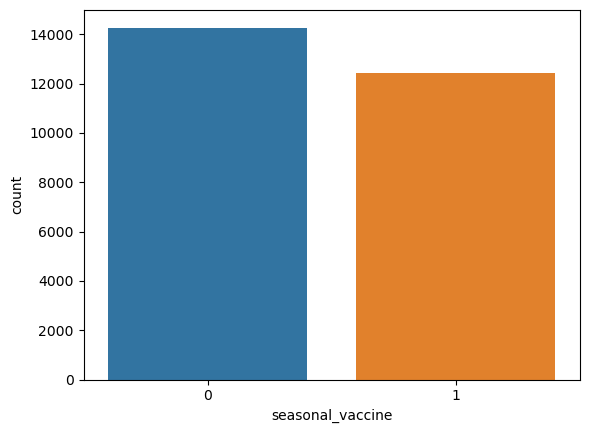

In [397]:
sns.countplot(x="seasonal_vaccine", data=labels);

### Dealing with outliers

In [398]:
sns.heatmap(data.corr())

C:\Users\danie\AppData\Local\Temp\ipykernel_2996\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

In [399]:
#We can remove respondent_id since it is deemed redundant
features.drop(['respondent_id'], axis = 1, inplace=True)

In [400]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

<AxesSubplot: >

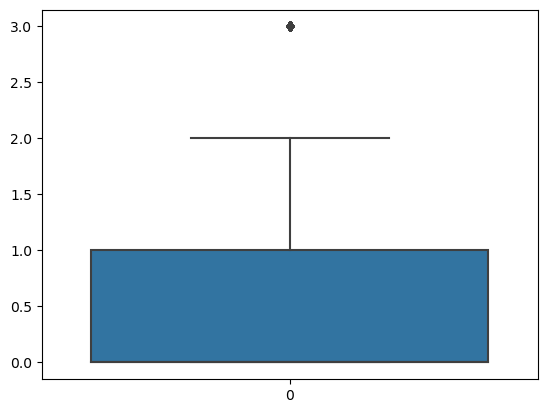

In [401]:
sns.boxplot(features.household_children)

<AxesSubplot: >

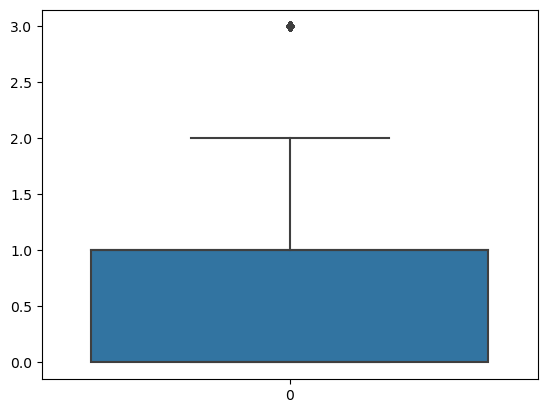

In [402]:
sns.boxplot(features.household_adults)

### Encoding

We convert all columns with a float dtype into an integer as they all do not lose any value after the decimal, alongside encoding all categorical data into a numeric form.

In [403]:
enc = LabelEncoder()
features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']].apply(enc.fit_transform)

features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']]

age_group  education  race  sex  income_poverty  marital_status  \
0              3          1     3    0               2               1   
1              1          0     3    1               2               1   
2              0          2     3    1               0               1   
3              4          0     3    0               2               1   
4              2          3     3    0               0               0   
...          ...        ...   ...  ...             ...             ...   
26702          4          3     3    0               0               1   
26703          0          2     3    1               0               1   
26704          3          3     3    0               3               1   
26705          0          3     1    0               0               0   
26706          4          3     3    1               0               0   

       rent_or_own  employment_status  census_msa  
0                0                  1           2  
1                1                  0           0  
2                0                  0           0  
3                1                  1           1  
4                0                  0           0  
...            ...                ...         ...  
26702            0                  1           2  
26703            1                  0           1  
26704            0                  3           0  
26705            1                  0           2  
26706            0                  1           1  

[26707 rows x 9 columns]

In [404]:
features.astype('int')

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                 1               0                          0   
1                 3               2                          0   
2                 1               1                          0   
3                 1               1                          0   
4                 2               1                          0   
...             ...             ...                        ...   
26702             2               0                          0   
26703             1               2                          0   
26704             2               2                          0   
26705             1               1                          0   
26706             0               0                          0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                         0                     0                      0   
1                         1                     0                      1   
2                         1                     0                      0   
3                         1                     0                      1   
4                         1                     0                      1   
...                     ...                   ...                    ...   
26702                     1                     0                      0   
26703                     1                     0                      1   
26704                     1                     1                      1   
26705                     0                     0                      0   
26706                     1                     0                      0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                                0                        1   
1                                0                        1   
2                                0                        0   
3                                1                        0   
4                                1                        0   
...                            ...                      ...   
26702                            0                        1   
26703                            0                        0   
26704                            1                        0   
26705                            0                        0   
26706                            0                        0   

       behavioral_touch_face  doctor_recc_h1n1  ...  education  race  sex  \
0                          1                 0  ...          1     3    0   
1                          1                 0  ...          0     3    1   
2                          0                 0  ...          2     3    1   
3                          0                 0  ...          0     3    0   
4                          1                 0  ...          3     3    0   
...                      ...               ...  ...        ...   ...  ...   
26702                      0                 0  ...          3     3    0   
26703                      0                 1  ...          2     3    1   
26704                      1                 0  ...          3     3    0   
26705                      1                 0  ...          3     1    0   
26706                      0                 0  ...          3     3    1   

       income_poverty  marital_status  rent_or_own  employment_status  \
0                   2               1            0                  1   
1                   2               1            1                  0   
2                   0               1            0                  0   
3                   2               1            1                  1   
4                   0               0            0                  0   
...               ...             ...          ...                ...   
26702               0               1            0                  1   
26703               0              

### Plotting Standard Deviation

In [405]:
features.std()

h1n1_concern                   0.909016
h1n1_knowledge                 0.617047
behavioral_antiviral_meds      0.215273
behavioral_avoidance           0.445127
behavioral_face_mask           0.253345
behavioral_wash_hands          0.379213
behavioral_large_gatherings    0.479264
behavioral_outside_home        0.472444
behavioral_touch_face          0.466942
doctor_recc_h1n1               0.401866
doctor_recc_seasonal           0.459592
chronic_med_condition          0.445490
child_under_6_months           0.271382
health_worker                  0.311077
health_insurance               0.246533
opinion_h1n1_vacc_effective    1.000195
opinion_h1n1_risk              1.276825
opinion_h1n1_sick_from_vacc    1.353339
opinion_seas_vacc_effective    1.077131
opinion_seas_risk              1.375216
opinion_seas_sick_from_vacc    1.319585
age_group                      1.457320
education                      1.186442
race                           0.923226
sex                            0.491136


In [406]:
std = labels['h1n1_vaccine'].std()
avg = labels['h1n1_vaccine'].std()

In [407]:
avg + std #1std above the mean

0.8181035868580915

In [408]:
avg-std #1std below the mean

0.0

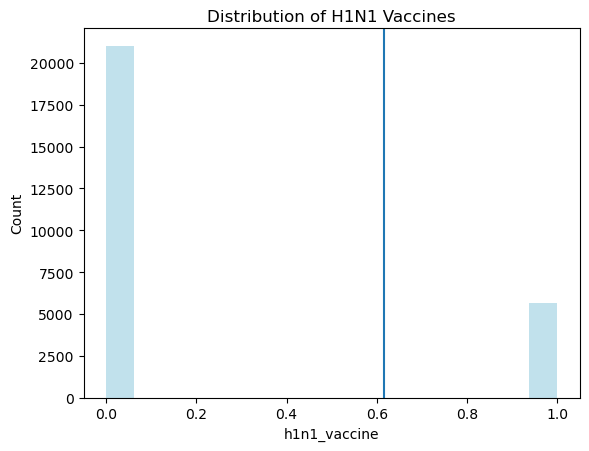

In [409]:
sns.histplot(x = labels['h1n1_vaccine'], color = 'lightblue', edgecolor = None )
plt.title("Distribution of H1N1 Vaccines", pad=5)

plt.axvline(x = 0.616261209611533, ymin = 0, ymax = labels["h1n1_vaccine"].max())

Standard distribution of H1N1 vaccines using a quantile range

### Visualisation

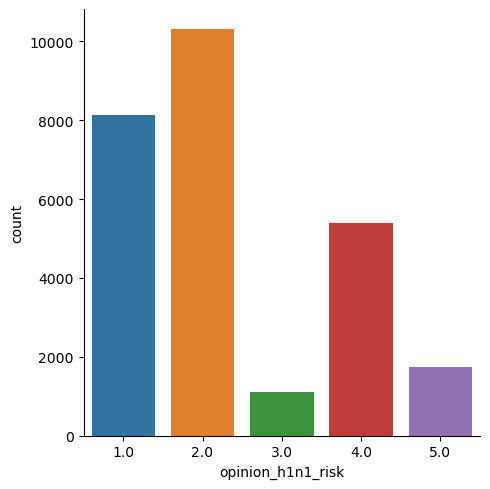

In [410]:
sns.catplot(data = features, x = "opinion_h1n1_risk", kind = "count")

Most people are not worried about the H1N1 vaccine

## Feature Scaling

In [411]:
X = features
y = labels

In [412]:
X = StandardScaler().fit_transform(X)

## Feature Selection

### Applying PCA

In [413]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

## Creating the models

In [414]:
X

array([[-0.68184881, -2.04427905, -0.22629268, ...,  1.4168754 ,
        -1.18346335, -0.57238698],
       [ 1.51837305,  1.19702709, -0.22629268, ..., -1.01237871,
        -1.18346335, -0.57238698],
       [-0.68184881, -0.42362598, -0.22629268, ..., -1.01237871,
         1.48332333, -0.57238698],
       ...,
       [ 0.41826212,  1.19702709, -0.22629268, ..., -1.01237871,
        -1.18346335, -0.57238698],
       [-0.68184881, -0.42362598, -0.22629268, ...,  1.4168754 ,
         0.14992999, -0.57238698],
       [-1.78195974, -2.04427905, -0.22629268, ...,  0.20224834,
         0.14992999, -0.57238698]])

In [415]:
features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  ...  education  race  sex  \
0                    1.0               0.0  ...          1     3    0   
1                    1.0               0.0  ...          0     3    1   
2                    0.0               0.0  ...          2     3    1   
3                    0.0               0.0  ...          0     3    0   
4                    1.0               0.0  ...          3     3    0   

   income_poverty  marital_status  rent_or_own  employment_status  census_msa  \
0               2               1            0                  1           2   
1               2               1            1                  0           0   
2               0               1            0                  0           0   
3               2               1            1                  1           1   
4               0               0            0                  0           0   

   household_adults  household_children  
0               0.0                 0.0  
1               0.0                 0.0  
2               2.0                 0.0  
3               0.0                 0.0  
4               1.0                 0.0  

[5 rows x 32 columns]

In [416]:
y

h1n1_vaccine  seasonal_vaccine
0                 0                 0
1                 0                 1
2                 0                 0
3                 0                 1
4                 0                 0
...             ...               ...
26702             0                 0
26703             0                 0
26704             0                 1
26705             0                 0
26706             0                 0

[26707 rows x 2 columns]

### Train/Test Split

In [417]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

### Naive Bayes

In [418]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance

model = BinaryRelevance(GaussianNB())

model.fit(x_train, y_train)

y_prediction_nb = model.predict(x_test)



In [419]:
accuracy_nb = accuracy_score(y_test, y_prediction_nb)
accuracy_nb

0.603144889554474

### Linear SVC using Multi Output Classifier

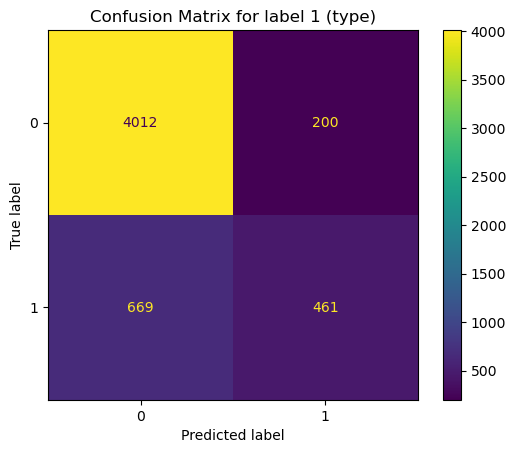

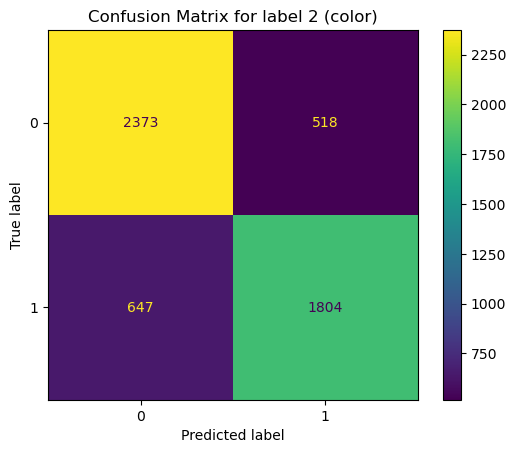

In [420]:

from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(x_train, y_train)

# Get predictions for test data
y_test_pred = multilabel_classifier.predict(x_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)

# Plotting matrices: code
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (type)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (color)')
plt.show()

In [421]:
accuracy_svc = accuracy_score(y_test, y_test_pred)
accuracy_svc

0.6720329464619993

### Random Forest 

In [422]:
random_forest = RandomForestClassifier()

In [423]:
random_forest.fit(x_train, y_train)

y_prediction_rf = random_forest.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_prediction_rf)
accuracy_rf

0.675028079371022

We use the support vector classicier with a linear kernel

### Multilabel K-Nearest Neighbour

In [424]:
"""
multilabel_KNN = MLkNN(k=3)

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'

clf = GridSearchCV(MLkNN(), parameters, scoring = score)
multilabel_KNN.fit(np.array(x_train), np.array(y_train))

y_prediction_knn = multilabel_KNN.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_prediction_knn)
accuracy_knn
"""


"\nmultilabel_KNN = MLkNN(k=3)\n\nparameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}\nscore = 'f1_macro'\n\nclf = GridSearchCV(MLkNN(), parameters, scoring = score)\nmultilabel_KNN.fit(np.array(x_train), np.array(y_train))\n\ny_prediction_knn = multilabel_KNN.predict(x_test)\n\naccuracy_knn = accuracy_score(y_test, y_prediction_knn)\naccuracy_knn\n"

### XGBoost Classifier

In [425]:
def plot_roc(y_true, y_score, label_name, ax, color=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    if color:
        ax.set_facecolor('lightblue')
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {metrics.roc_auc_score(y_true, y_score):.4f}"
    )

In [426]:
import xgboost as xgb

xgb_cl = MultiOutputClassifier(estimator=xgb.XGBClassifier(n_estimators=1000, verbosity=1, n_jobs=-1, learning_rate=0.05))
xgb_cl.fit(x_train, y_train)
preds = xgb_cl.predict(x_test)

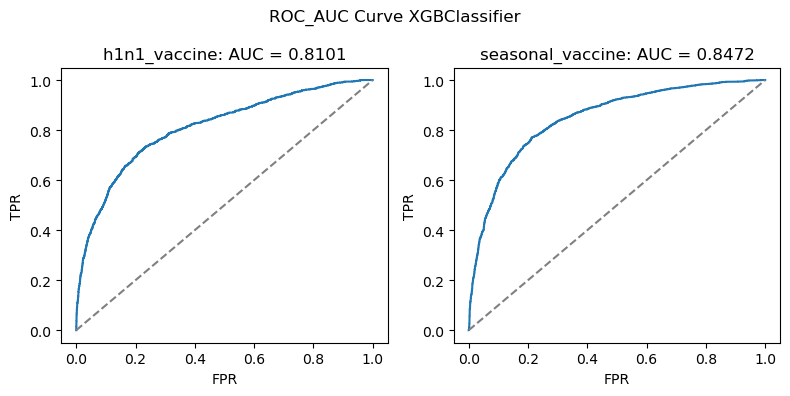

In [427]:
y_preds = xgb_cl.predict_proba(x_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle(f"ROC_AUC Curve XGBClassifier")

plot_roc(y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

## Submission Dataframe

In [428]:
metrics.roc_auc_score(y_test, y_preds_both)

0.8286693955626607

In [429]:
y_test_h1n1 = y_test.loc[:, ['h1n1_vaccine']]
y_test_seasonal = y_test.loc[:, ["seasonal_vaccine"]]

In [430]:
y_test_h1n1.shape

(5342, 1)

In [431]:
y_pred_h1n1 = y_preds_both.loc[:, 'h1n1_vaccine']
y_pred_seasonal = y_preds_both.loc[:, "seasonal_vaccine"]

In [432]:
target = ["Non-Vaccinated", "Vaccinated"]

H1N1 Vaccines

In [433]:
print(metrics.classification_report(y_test_h1n1.round(), y_pred_h1n1.round(), target_names = target))

                precision    recall  f1-score   support

Non-Vaccinated       0.86      0.93      0.90      4212
    Vaccinated       0.64      0.44      0.53      1130

      accuracy                           0.83      5342
     macro avg       0.75      0.69      0.71      5342
  weighted avg       0.82      0.83      0.82      5342



Seasonal Vaccines

In [434]:
print(metrics.classification_report(y_test_seasonal.round(), y_pred_seasonal.round(), target_names = target))

                precision    recall  f1-score   support

Non-Vaccinated       0.79      0.79      0.79      2891
    Vaccinated       0.76      0.76      0.76      2451

      accuracy                           0.78      5342
     macro avg       0.77      0.77      0.77      5342
  weighted avg       0.78      0.78      0.78      5342



## Submission File

In [435]:
test_features_df = pd.read_csv("test_set_features.csv")

In [436]:
test_features_df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          26707           2.0             2.0                        0.0   
1          26708           1.0             1.0                        0.0   
2          26709           2.0             2.0                        0.0   
3          26710           1.0             1.0                        0.0   
4          26711           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   
2                          1.0                      1.0   
3                          0.0                      0.0   
4                          1.0                      1.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...                  > $75,000     Not Married   
1                    0.0  ...              Below Poverty     Not Married   
2                    1.0  ...                  > $75,000         Married   
3                    0.0  ...  <= $75,000, Above Poverty         Married   
4                    1.0  ...  <= $75,000, Above Poverty     Not Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0         Rent            Employed        mlyzmhmf  MSA, Not Principle  City   
1         Rent            Employed        bhuqouqj                   Non-MSA   
2          Own            Employed        lrircsnp                   Non-MSA   
3          Own  Not in Labor Force        lrircsnp  MSA, Not Principle  City   
4          Own            Employed        lzgpxyit                   Non-MSA   

   household_adults  household_children  employment_industry  \
0               1.0                 0.0             atmlpfrs   
1               3.0                 0.0             atmlpfrs   
2               1.0                 0.0             nduyfdeo   
3               1.0                 0.0                  NaN   
4               0.0                 1.0             fcxhlnwr   

   employment_occupation  
0               hfxkjkmi  
1               xqwwgdyp  
2               pvmttkik  
3                    NaN  
4               mxkfnird  

[5 rows x 36 columns]

Pre-processing of testing features dataframe

In [450]:
def testing_preprocessing():

    test_features_df.drop(["respondent_id", "hhs_geo_region", "employment_industry", "employment_occupation"], axis = 1, inplace = True)

    return test_features_df
    

In [451]:
numeric_data = test_features_df._get_numeric_data()
for column in numeric_data:
    test_features_df[column].fillna(test_features_df[column].median(), inplace= True)
        
for column in categorical_data:
    test_features_df[column].fillna(test_features_df[column].mode()[0], inplace=True)

In [452]:
test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']].apply(enc.fit_transform)

test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']]

age_group  education  race  sex  income_poverty  marital_status  \
0            3.0        1.0   3.0  0.0             2.0             1.0   
1            1.0        0.0   3.0  1.0             2.0             1.0   
2            0.0        2.0   3.0  1.0             0.0             1.0   
3            4.0        0.0   3.0  0.0             2.0             1.0   
4            2.0        3.0   3.0  0.0             0.0             0.0   
...          ...        ...   ...  ...             ...             ...   
26703        0.0        2.0   3.0  1.0             0.0             1.0   
26704        3.0        3.0   3.0  0.0             3.0             1.0   
26705        0.0        3.0   1.0  0.0             0.0             0.0   
26706        4.0        3.0   3.0  1.0             0.0             0.0   
26707        NaN        NaN   NaN  NaN             NaN             NaN   

       rent_or_own  employment_status  census_msa  
0              0.0                1.0         2.0  
1              1.0                0.0         0.0  
2              0.0                0.0         0.0  
3              1.0                1.0         1.0  
4              0.0                0.0         0.0  
...            ...                ...         ...  
26703          1.0                0.0         1.0  
26704          0.0                3.0         0.0  
26705          1.0                0.0         2.0  
26706          0.0                1.0         1.0  
26707          NaN                NaN         NaN  

[26708 rows x 9 columns]

In [453]:
test_features_df.head(15)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           26707           2.0             2.0                        0.0   
1           26708           1.0             1.0                        0.0   
2           26709           2.0             2.0                        0.0   
3           26710           1.0             1.0                        0.0   
4           26711           3.0             1.0                        1.0   
5           26712           2.0             2.0                        0.0   
6           26713           2.0             2.0                        0.0   
7           26714           2.0             1.0                        0.0   
8           26715           1.0             1.0                        0.0   
9           26716           2.0             2.0                        0.0   
10          26717           3.0             1.0                        0.0   
11          26718           1.0             2.0                        0.0   
12          26719           2.0             1.0                        0.0   
13          26720           1.0             1.0                        0.0   
14          26721           1.0             2.0                        1.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                    1.0                   0.0                    1.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   1.0                    1.0   
3                    0.0                   0.0                    0.0   
4                    1.0                   0.0                    1.0   
5                    1.0                   0.0                    1.0   
6                    1.0                   0.0                    1.0   
7                    1.0                   0.0                    1.0   
8                    1.0                   0.0                    1.0   
9                    0.0                   0.0                    1.0   
10                   1.0                   0.0                    1.0   
11                   1.0                   0.0                    1.0   
12                   1.0                   0.0                    1.0   
13                   1.0                   0.0                    1.0   
14                   0.0                   0.0                    0.0   

    behavioral_large_gatherings  behavioral_outside_home  \
0                           1.0                      0.0   
1                           0.0                      0.0   
2                           1.0                      1.0   
3                           0.0                      0.0   
4                           1.0                      1.0   
5                           1.0                      0.0   
6                           1.0                      0.0   
7                           0.0                      0.0   
8                           1.0                      1.0   
9                           0.0                      0.0   
10                          0.0                      0.0   
11                          0.0                      0.0   
12                          0.0                      1.0   
13                          0.0                      0.0   
14                          0.0                      0.0   

    behavioral_touch_face  ...  income_poverty  marital_status  rent_or_own  \
0                     1.0  ...             2.0             1.0          0.0   
1                     0.0  ...             2.0             1.0          1.0   
2                     1.0  ...             0.0             1.0          0.0   
3                     0.0  ...             2.0             1.0          1.0   
4                     1.0  ...             0.0             0.0          0.0   
5                     1.0  ...             0.0             0.0          0.0   
6                     1.0  ...             0.0             1.0          

In [ ]:
test_features_df = testing_preprocessing()

KeyError: "['respondent_id', 'hhs_geo_region', 'employment_industry', 'employment_occupation'] not found in axis"

In [ ]:
test_features_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           2.0             2.0                        0.0   
1           1.0             1.0                        0.0   
2           2.0             2.0                        0.0   
3           1.0             1.0                        0.0   
4           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   
2                          1.0                      1.0   
3                          0.0                      0.0   
4                          1.0                      1.0   

   behavioral_touch_face  doctor_recc_h1n1  ...         education      race  \
0                    1.0               0.0  ...  College Graduate  Hispanic   
1                    0.0               0.0  ...          12 Years     White   
2                    1.0               0.0  ...  College Graduate     White   
3                    0.0               1.0  ...          12 Years     White   
4                    1.0               0.0  ...          12 Years     Black   

      sex             income_poverty  marital_status  rent_or_own  \
0  Female                  > $75,000     Not Married         Rent   
1    Male              Below Poverty     Not Married         Rent   
2    Male                  > $75,000         Married          Own   
3  Female  <= $75,000, Above Poverty         Married          Own   
4  Female  <= $75,000, Above Poverty     Not Married          Own   

    employment_status                census_msa  household_adults  \
0            Employed  MSA, Not Principle  City               1.0   
1            Employed                   Non-MSA               3.0   
2            Employed                   Non-MSA               1.0   
3  Not in Labor Force  MSA, Not Principle  City               1.0   
4            Employed                   Non-MSA               0.0   

   household_children  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 1.0  

[5 rows x 32 columns]

In [ ]:
test_features_df = testing_preprocessing()

KeyError: "['respondent_id', 'hhs_geo_region', 'employment_industry', 'employment_occupation'] not found in axis"

In [ ]:
submission_df = pd.read_csv("submission_format.csv")

In [ ]:
submission_df.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0          26707           0.5               0.7
1          26708           0.5               0.7
2          26709           0.5               0.7
3          26710           0.5               0.7
4          26711           0.5               0.7

In [ ]:
submission["h1n1_vaccine = "]